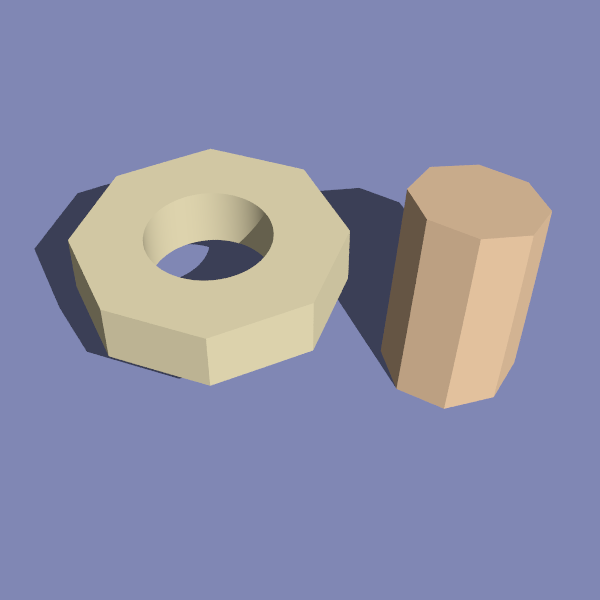

In [4]:
""" Octogons, after Friedrich A. Lohmueller 
http://www.f-lohmueller.de
This example demonstrates well how you make an intersection or
difference between geometrical shapes in POV-Ray."""

from vapory import * #vaporyライブラリを呼び出す
#Mathと打つと数学の定理(Piなど)を呼び出すこともできる

camera = Camera( 'ultra_wide_angle', 'angle', 30, #カメラを定義する　アングルの種類、角度を指定する
                 'location', [0.0 , 6.8 ,-6.0], #カメラ自体の位置をx,y,z軸で指定する
                 'look_at',  [0.0 , 0.8 , 0.0]) #カメラが向く方向をx,y,z軸で指定する

sun = LightSource([1500,2500,-2500], 'color',1) #光源の位置、色、強さを指定する

sky = Sphere(  [0,0,0],1, 'hollow', #空を定義する。hollowなので、何もない空
              Texture(  Pigment(  'gradient', [0,1,0], #テクスチャーのグラデーションを定義
                                  ColorMap([0, 'color', 'White'],
                                           [1, 'color', 'Blue' ]),
                                  'quick_color', 'White'), #quick_colorはVaporyの中から呼び出している？
                        Finish( 'ambient', 1, 'diffuse', 0)), #Ambientはベタ塗りのフォルム、Diffuseは影
              'scale', 10000) #空の大きさ

ground =    Plane(  [0,1,0], 0 , #地面を定義する
            Texture( Pigment( 'color', [1.1*e for e in [0.40,0.45,0.85]])), #Pigmentは「顔料」
            Finish(  'phong', 0.1 )) #Phongシェーディングで描画する(なめらかなポリゴン)

octagon1 = Intersection( #里芋(右)を定義する
   Box( [-1, 0.0,-1], [ 1,1.0,1 ] ), #Box Aを作る
   Box( [-1,-0.1,-1], [ 1,1.1,1 ], 'rotate', [0,45,0] ), #Rotateは「回転」
    #45度回転させたBox BをBox Aの上に重ね、切り抜く
    #Boxはx,y,zの座標指定で立方体を作ることができる
   
   'scale', [0.5,2.5,0.5],
   Texture( Pigment( 'color', [1.3,0.91,0.58]),
            Finish ( 'phong', 1)),
   'rotate', [10,30,0],
   'translate', [1.1,-1.00,0]) #Translateは距離を離すときに使う

octagon2 = Intersection( #ちくわ(左)を定義する
   Box( [-1, 0.0,-1], [ 1,1.0,1 ] ),
   Box( [-1,-0.1,-1], [ 1,1.1,1 ], 'rotate', [0,45,0] ),
   Cylinder([0,-0.1,0],[0,1.1,0],0.5, 'inverse'), #中央をシリンダーでくり抜く(Inverse)
   
   'scale', [1,0.5,1],
   Texture( Pigment( 'color', [1.3,1.17,0.75]),
            Finish ( 'phong', 1)),
   'rotate', [0,-25,0],
   'translate', [-0.7,0.50,0.5])

scene = Scene( camera, [sun, sky, ground, octagon1, octagon2], #上で定義したものの中から、表示させるものを呼び出す
               included=['colors.inc', 'textures.inc']) #.incはVaporyからの呼び出し？

scene.render('ipython', width=600, height=600, antialiasing=0.001) #ipythonとして、jupyter上にsceneをレンダリングする